In [1]:
!pip install scikeras

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, History
from scikeras.wrappers import KerasClassifier
from google.colab import drive
import time

# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test_size = 0.9
epochs = 100
batch_size = 32
learning_rate = 0.0001
validation_split = 0.1

# **DeepSlice Dataset with Standalone Neural Network**

In [5]:
# Load deepslice_data.csv
data3 = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')

# Data pre-processing
# Feature Conversion - Categorical to Numerical
one_hot_encoded_data3 = pd.get_dummies(data3, columns = ['Day','Use Case', 'Technology Supported', 'GBR'])
data3_ohe = one_hot_encoded_data3.rename(columns={'Day_sunday':'sunday','Day_monday':'monday','Day_tuesday':'tuesday','Day_wednesday':'wednesday','Day_thrusday':'thrusday','Day_friday':'friday','Day_saturday':'saturday','Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
data3 = data3_ohe[['LTE/5g Category', 'Time', 'sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', 'Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]

# Replace boolean values with 0 and 1 in specified columns
columns_to_convert = ['sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', "IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
for column in columns_to_convert:
    data3[column] = data3[column].replace({False: 0, True: 1})

data3 = data3.drop_duplicates()

X3 = data3.drop('slice Type', axis=1)
y3 = data3['slice Type']

# Encode target labels if necessary
le = LabelEncoder()
y3_encoded = le.fit_transform(y3)

# Scale features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Split data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3_encoded, test_size=test_size, random_state=42)

##################################################################################################
# Create a new model with input layer
model3 = Sequential()
model3.add(Dense(64, input_dim=X3_scaled.shape[1], activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(y3.nunique(), activation='softmax'))

#################################################################################################

# Compile the model
model3.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a history object to store training metrics
history = History()

# start time
start_time_neural_network = time.time()

# Train the model on new data
model3.fit(X3_train, y3_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=[early_stopping, history])

# end time
end_time_neural_network = time.time()

latency_neural_network = end_time_neural_network - start_time_neural_network
print(f"\n Latency for Standalone Neural Network: {latency_neural_network} seconds")

# Evaluate on test set
loss3, accuracy3 = model3.evaluate(X3_test, y3_test)
print(f"Test Accuracy: {accuracy3:.4f}")

<ipython-input-5-9aa1c97273fb>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3[column] = data3[column].replace({False: 0, True: 1})
<ipython-input-5-9aa1c97273fb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[column] = data3[column].replace({False: 0, True: 1})


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3116 - loss: 1.3795 - val_accuracy: 0.6630 - val_loss: 0.9041
Epoch 2/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4852 - loss: 1.0400 - val_accuracy: 0.8275 - val_loss: 0.6859
Epoch 3/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6223 - loss: 0.8272 - val_accuracy: 0.9415 - val_loss: 0.5241
Epoch 4/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7085 - loss: 0.6781 - val_accuracy: 0.9668 - val_loss: 0.3951
Epoch 5/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7788 - loss: 0.5633 - val_accuracy: 0.9810 - val_loss: 0.2911
Epoch 6/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8313 - loss: 0.4540 - val_accuracy: 0.9889 - val_loss: 0.2098
Epoch 7/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3761 - val_accuracy: 0.9905 - val_loss: 0.1521
Epoch 8/100
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9008 - loss: 0.3031 - val_accuracy: 0.9953

In [6]:
# print(y1[:5])  # Check the first few labels for the base model
# print(y2_encoded[:5])  # Check the first few labels for the transfer learning part

# **Base Model using Neural Network on 5G Slice Ndd Dataset**

In [7]:
# Load the preprocessed dataset
data1 = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')

# Separate features and target
X1 = data1.drop('SliceType', axis=1)
y1 = data1['SliceType']

# Encode target labels
le = LabelEncoder()
y1_encoded = le.fit_transform(y1)
y1 = to_categorical(y1_encoded)

# Scale features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the features
X1_scaled = scaler.fit_transform(X1)

# Convert back to DataFrame for easier handling
X1 = pd.DataFrame(X1_scaled, columns=X1.columns)

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

###############################################################################################################
# Build the neural network model
model1 = Sequential()
model1.add(Dense(64, input_dim=X1.shape[1], activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(y1.shape[1], activation='softmax'))

###############################################################################################################

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a history object to store training metrics
history = History()

# start time
start_time_base_model1_training = time.time()

# Train the model with early stopping and history callbacks
model1.fit(X1_train, y1_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, history])

# end time
end_time_base_model1_training = time.time()

latency_base_model1_training = end_time_base_model1_training - start_time_base_model1_training
print(f"\n Latency for base model1 training: {latency_base_model1_training} seconds")

# Evaluate the model
loss1, accuracy1 = model1.evaluate(X1_test, y1_test)
print(f"Test Accuracy: {accuracy1:.4f}")

# Save the trained model if needed
model1.save('5g_slicendd_model1.h5')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3496 - loss: 3.6371 - val_accuracy: 0.3065 - val_loss: 2.0133
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3746 - loss: 9.2696 - val_accuracy: 0.3545 - val_loss: 1.8527
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3753 - loss: 3.8664 - val_accuracy: 0.4073 - val_loss: 1.6962
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3833 - loss: 3.4208 - val_accuracy: 0.4557 - val_loss: 1.5612
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4143 - loss: 3.5218 - val_accuracy: 0.4911 - val_loss: 1.4330
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4114 - loss: 2.8962 - val_accuracy: 0.5244 - val_loss: 1.3204
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4213 - loss: 3.1302 - val_accuracy: 0.5547 - val_loss: 1.2103
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 2.6309 - val_accuracy: 0.5893 - val_

Test Accuracy: 0.8607


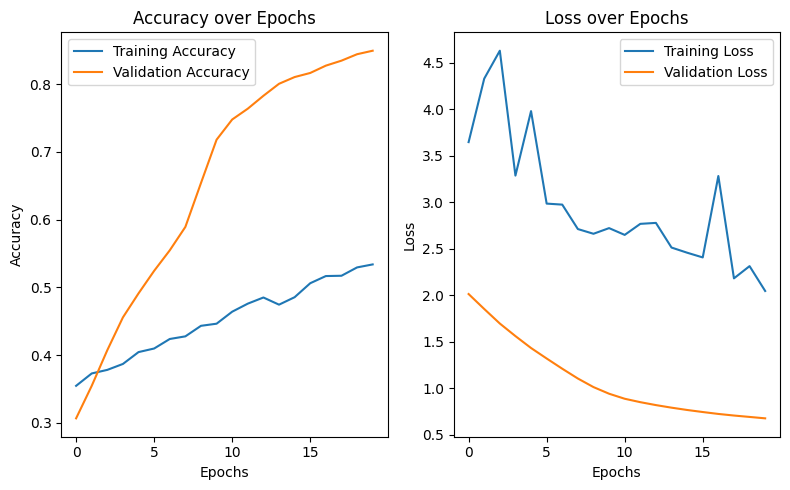

In [10]:
# Retrieve metrics from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print metrics for each epoch
# for epoch in range(len(train_acc)):
#     print(f"Epoch {epoch+1}:")
#     print(f"  Training Accuracy: {train_acc[epoch]:.4f}, Validation Accuracy: {val_acc[epoch]:.4f}")
#     print(f"  Training Loss: {train_loss[epoch]:.4f}, Validation Loss: {val_loss[epoch]:.4f}")

# Plot accuracy and loss over epochs
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Transfer Learning on Deep Slice Dataset**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load deepslice_data.csv
# data2 = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')

# # Data pre-processing
# # Feature Conversion - Categorical to Numerical
# one_hot_encoded_data2 = pd.get_dummies(data2, columns = ['Day','Use Case', 'Technology Supported', 'GBR'])
# data2_ohe = one_hot_encoded_data2.rename(columns={'Day_sunday':'sunday','Day_monday':'monday','Day_tuesday':'tuesday','Day_wednesday':'wednesday','Day_thrusday':'thrusday','Day_friday':'friday','Day_saturday':'saturday','Use Case_AR/VR/Gaming':'AR/VR/Gaming','Use Case_Healthcare':'Healthcare','Use Case_Industry 4.0':'Industry 4.0','Use Case_IoT Devices':'IoT Devices','Use Case_Public Safety':'Public Safety','Use Case_Smart City & Home':'Smart City & Home','Use Case_Smart Transportation':'Smart Transportation','Use Case_Smartphone':'Smartphone','Technology Supported_IoT(LTE-M, NB-IoT)':'IoT','Technology Supported_LTE/5G':'LTE/5G','GBR_GBR':'GBR','GBR_Non-GBR':'Non-GBR'})
# data2 = data2_ohe[['LTE/5g Category', 'Time', 'sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', 'Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone', 'slice Type']]

# # Replace boolean values with 0 and 1 in specified columns
# columns_to_convert = ['sunday', 'monday', 'tuesday', 'wednesday', 'thrusday', 'friday', 'saturday', "IoT", "LTE/5G", "GBR", "Non-GBR", "AR/VR/Gaming", "Healthcare", "Industry 4.0", "IoT Devices", "Public Safety", "Smart City & Home", "Smart Transportation", "Smartphone"]
# for column in columns_to_convert:
#     data2[column] = data2[column].replace({False: 0, True: 1})

# data2 = data2.drop_duplicates()

# X2 = data2.drop('slice Type', axis=1)
# y2 = data2['slice Type']

# # Encode target labels if necessary
# le = LabelEncoder()
# y2_encoded = le.fit_transform(y2)

# # Scale features
# scaler = StandardScaler()
# X2_scaled = scaler.fit_transform(X2)

# Split data into train and test sets
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2_encoded, test_size=test_size, random_state=42)

X2_train, X2_test, y2_train, y2_test = X3_train, X3_test, y3_train, y3_test

##################################################################################################
# Load pre-trained model
model1 = load_model('5g_slicendd_model1.h5')

# Freeze layers if needed
# for layer in model1.layers[:-2]:  # Freeze all but last layer
#     layer.trainable = False

# Create a new model with adjusted input layer
model2 = Sequential()

# Add a new input layer with the correct shape
model2.add(Dense(64, activation='relu', input_shape=(X2_train.shape[1],)))

# Add layers from the pre-trained model (excluding the input layer)
for layer in model1.layers[1:]:
    model2.add(layer)

#################################################################################################

# Compile the model
model2.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Create a history object to store training metrics
history2 = History()

# start time
start_time_transfer_learning = time.time()

# epoch = 0
# while epoch >= 0:
for epoch in range(epochs):
  # Train the model on new data
  print(f"\n Epoch: {epoch+1}")
  model2.fit(X2_train, y2_train, epochs=1, batch_size=batch_size, validation_split=validation_split, callbacks=[early_stopping, history2])

  # end time
  end_time_transfer_learning = time.time()

  latency_transfer_learning = end_time_transfer_learning - start_time_transfer_learning

  print("\n latency_transfer_learning:", latency_transfer_learning, "\t latency_neural_network:", latency_neural_network, "\n")

  should_stop_training = latency_transfer_learning >= latency_neural_network
  if should_stop_training:
    print("\n Training stopped as latency limit is reached")
    break
  # epoch += 1

print(f"\n Latency for transfer learning: {latency_transfer_learning} seconds")

# Evaluate on test set
loss2, accuracy2 = model2.evaluate(X2_test, y2_test)
print(f"Test Accuracy: {accuracy2:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Epoch: 1
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3818 - loss: 1.2340 - val_accuracy: 0.7864 - val_loss: 0.7906

 latency_transfer_learning: 1.6746079921722412 	 latency_neural_network: 63.934396266937256 


 Epoch: 2
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5736 - loss: 0.9165 - val_accuracy: 0.9035 - val_loss: 0.5831

 latency_transfer_learning: 2.1932013034820557 	 latency_neural_network: 63.934396266937256 


 Epoch: 3
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.7486 - val_accuracy: 0.9367 - val_loss: 0.4358

 latency_transfer_learning: 2.892707347869873 	 latency_neural_network: 63.934396266937256 


 Epoch: 4
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.6041 - val_accuracy: 0.9573 - val_loss: 0.3255

 latency_transfer_learning: 3.4355952739715576 	 latency_neural_network: 63.934396266937256 


 Epoch: 5
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4967 - val_accuracy: 0.9668 

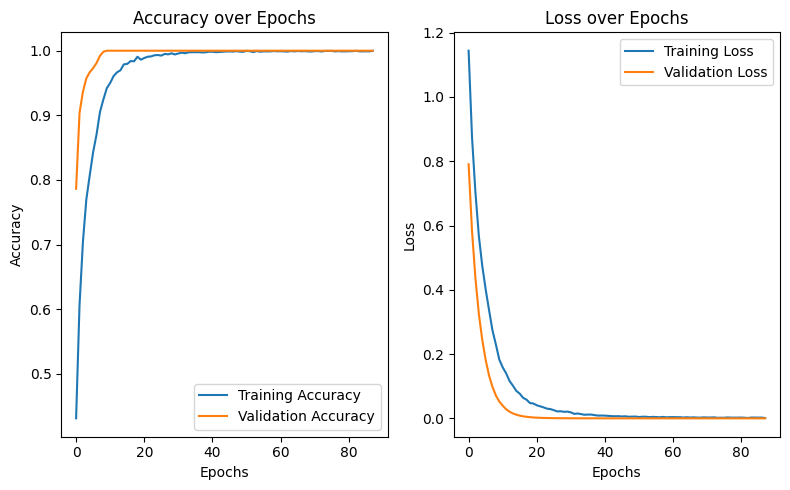

In [12]:
# Retrieve metrics from the history object
train_acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Print metrics for each epoch
# for epoch in range(len(train_acc)):
#     print(f"Epoch {epoch+1}:")
#     print(f"  Training Accuracy: {train_acc[epoch]:.4f}, Validation Accuracy: {val_acc[epoch]:.4f}")
#     print(f"  Training Loss: {train_loss[epoch]:.4f}, Validation Loss: {val_loss[epoch]:.4f}")

# Plot accuracy and loss over epochs
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp16_5G_SLiceNdd_NSI_Transfer_Learning.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'